In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from matplotlib.ticker import MaxNLocator

In [2]:
# Baixa os dados históricos da WEGE3 (ações da WEG S.A.) usando o yfinance
weg = yf.download('WEGE3.SA', start='2021-01-01', end='2024-05-31')

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Função para o cap dos outliers
def cap_outliers(series, upper_quantile=0.95):
    upper_limit = series.quantile(upper_quantile)
    return series.clip(upper=upper_limit)

In [4]:
# Calcula a média móvel de 30 dias
weg['Moving Average'] = weg['Close'].rolling(window=30).mean()

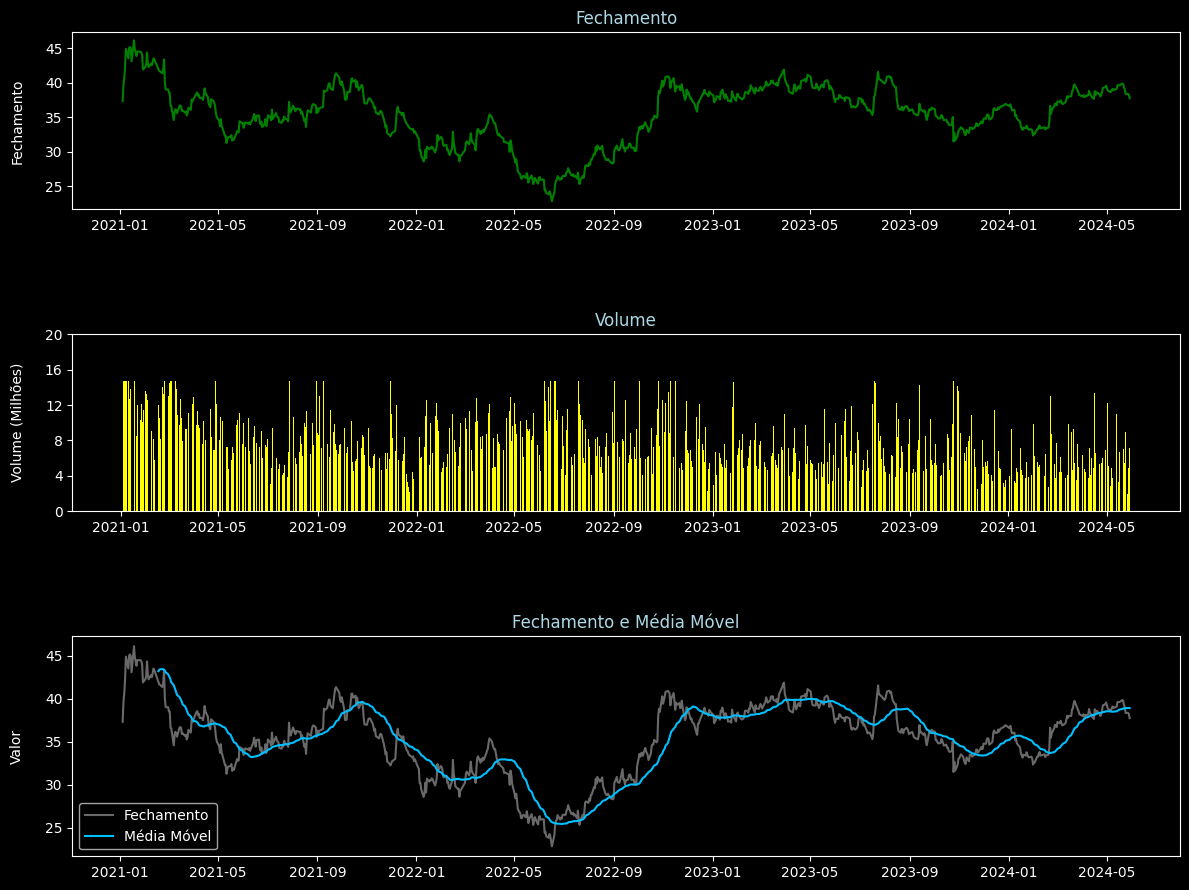

In [5]:

# Define a função para plotar os gráficos de fechamento, volume e "Fechamento e Média Móvel"
def plot_ohlcv(weg):
    # Configurando o estilo do gráfico
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(12, 9)) # Tamanho geral do plot 
    gs = fig.add_gridspec(nrows=20, ncols=1) # Total do número de linhas do plot

    ax1 = fig.add_subplot(gs[0:5, 0]) # Ajusta o primeiro subplot para ocupar as linhas 0 a 4 (5 linhas)
    ax2 = fig.add_subplot(gs[7:12, 0]) # Ajusta o segundo subplot para ocupar as linhas 7 a 11 (5 linhas)
    ax3 = fig.add_subplot(gs[14:20, 0]) # Adiciona um terceiro subplot que ocupa as linhas 14 a 19 (6 linhas)

    # Manter os caps dos outliers no volume
    weg['Volume'] = cap_outliers(weg['Volume'] / 1e6) # Divide por 1 milhão e definir cap dos outliers
    ax1.plot(weg['Close'], color='green')
    ax1.set_title('Fechamento', color='lightblue')
    ax1.set_ylabel('Fechamento', labelpad=15) # Adiciona labelpad para separar o rótulo dos valores do eixo y

    ax2.set_title('Volume', color='lightblue')
    ax2.set_ylabel('Volume (Milhões)', labelpad=15) # Adiciona labelpad para separar o rótulo dos valores do eixo y
    ax2.bar(weg.index, weg['Volume'], color='yellow')
    ax2.ticklabel_format(style='plain', axis='y') # Desativa o formato científico no eixo y do segundo gráfico
    ax2.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=5)) # Eixo y do segundo gráfico valores de 0 a 20
    ax2.set_ylim(0, 20) # Limites do eixo y do gráfico de volume para até 20

    ax3.set_title('Fechamento e Média Móvel', color='lightblue') # Ajusta o rótulo do eixo y do terceiro gráfico
    ax3.set_ylabel('Valor', labelpad=15) # Adiciona labelpad para separar o rótulo dos valores do eixo y
    ax3.plot(weg['Close'], color='#696969', label='Fechamento') # Colunas "Close" e "Moving Average" no terceiro gráfico
    ax3.plot(weg['Moving Average'], color='deepskyblue', label='Média Móvel')
    ax3.legend(loc='lower left') # Legenda terceiro gráfico e ajusta sua posição para a base inferior esquerda

    plt.tight_layout() # Espaçamento dos gráficos

    plt.show()

plot_ohlcv(weg)
